<a href="https://colab.research.google.com/github/tumuluripradeep/AIML_PA2_M11_1/blob/main/prompt_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

**Data Problem Definition**:

The goal is to verify what factors drive the price of the car by doing following:

1. Understand data
2. Clean data
3. Analyze the data
4. Perform/apply ML model techniques learning so far.
    *   Linear Regressoin, Lasso Regression,Ridge Regression
    *   Apply hyperparameters tuning such as such as degree of polynomial
    *   Perform Principal Component analysis to finialze most important columns
    *   Perform KMeans/DBScan clustering techniques

5. Then Evalaute each model
    *   Caluate RMSE/Root Absolute Error
    *   Compare each values and find lowest root mean square error of all

6. Finally, optimize and fine tune and determine the list of key features that dirve the car price that buyers would be looking at.

     

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#Read from csv
car_df = pd.read_csv("data/vehicles.csv")


In [ ]:
# Data understanding
display(f"Data has {car_df.shape[0]} rows and {car_df.shape[1]} columns")

'Data has 426880 rows and 18 columns'

In [ ]:
display(car_df.sample(20))
display(car_df.info())
display(car_df.describe())
display(f'duplicates (if any):  {car_df.duplicated().sum()}')
display(car_df.corr(numeric_only=True))

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
296942,7309135165,columbus,7995,2009.0,acura,mdx,fair,6 cylinders,gas,97085.0,clean,automatic,NaN,4wd,mid-size,SUV,NaN,oh
195850,7316941129,detroit metro,4500,2005.0,ford,mustang gt,NaN,NaN,gas,113000.0,rebuilt,automatic,NaN,NaN,NaN,NaN,NaN,mi
371686,7316927674,del rio / eagle pass,20551,2015.0,honda,civic,NaN,NaN,gas,44848.0,clean,NaN,NaN,fwd,compact,other,grey,tx
298718,7311682369,dayton / springfield,8495,2006.0,ford,f-150 supercrew fx-4 4wd,good,8 cylinders,gas,165000.0,clean,automatic,NaN,4wd,full-size,pickup,black,oh
178871,7313288075,maine,3800,2005.0,NaN,sterling acterra,NaN,NaN,diesel,218033.0,clean,automatic,2FZACGDCX5AN66769,NaN,NaN,NaN,NaN,me
271791,7316954075,long island,1,1960.0,NaN,1960 Lotus Elite,NaN,NaN,gas,34000.0,clean,manual,NaN,NaN,NaN,NaN,NaN,ny
404717,7306966483,kennewick-pasco-richland,46999,2018.0,toyota,4runner trd off road 4x4,NaN,NaN,gas,23025.0,clean,automatic,JTEBU5JR6J5549032,4wd,NaN,SUV,silver,wa
218307,7308086555,gulfport / biloxi,7000,2016.0,NaN,Hyndai Sonata,good,4 cylinders,gas,141000.0,clean,automatic,NaN,fwd,NaN,sedan,white,ms
167461,7306755183,manhattan,28590,2018.0,acura,rdx advance pkg sport,good,6 cylinders,gas,30316.0,clean,other,5J8TB3H76JL010169,fwd,NaN,other,NaN,ks
296884,7309482845,columbus,44900,2017.0,NaN,international 4300,good,6 cylinders,diesel,163456.0,clean,automatic,NaN,rwd,NaN,NaN,yellow,oh


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

None

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


'duplicates (if any):  0'

,id,price,year,odometer
id,1.000000,-0.002779,-0.059040,0.010721
price,-0.002779,1.000000,-0.004925,0.010032
year,-0.059040,-0.004925,1.000000,-0.157215
odometer,0.010721,0.010032,-0.157215,1.000000


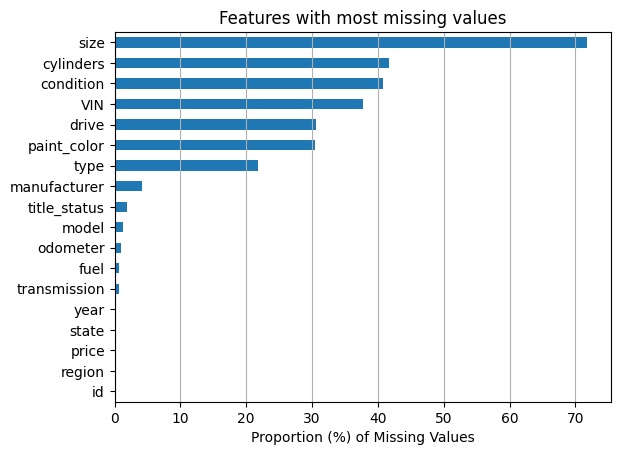

In [ ]:
#show NaN proportion
car_df_mean = car_df.isnull().mean() * 100
car_df_mean.sort_values().plot(kind='barh')
plt.xlabel('Proportion (%) of Missing Values')
plt.title('Features with most missing values')
plt.grid(axis='x')
plt.show()

In [ ]:
#Taking random sample for faster processing to understand data
car_df_sample = car_df.sample(10000, random_state=42)

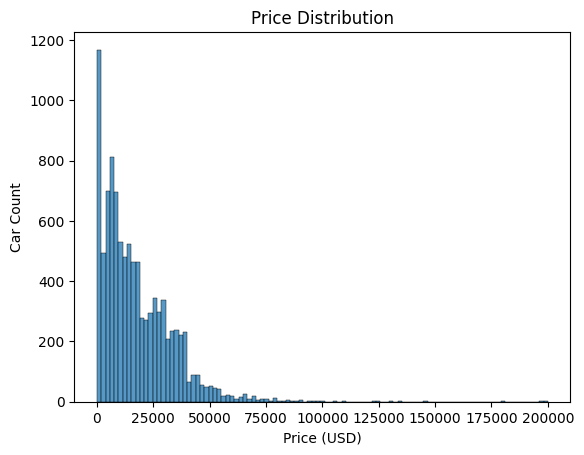

In [ ]:
ax = sns.histplot(data = car_df_sample.query("price<200000"), x='price')
ax.set_title('Price Distribution')
ax.set_xlabel('Price (USD)')
ax.set_ylabel('Car Count')
plt.show()

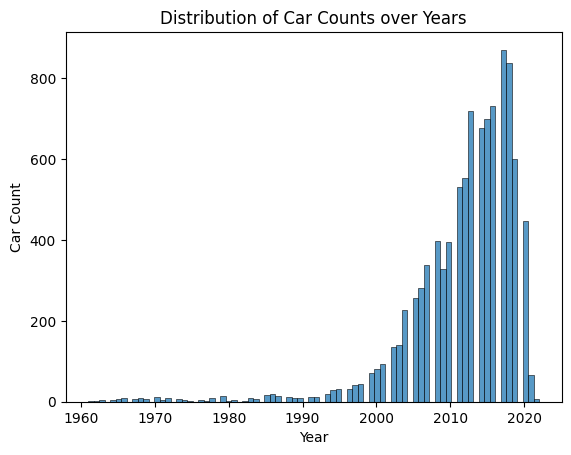

In [ ]:
#Year greater than 1960 cars the visual is more meaningful.  Most of the cars are manufactured towards the later years toward 2022.
ax = sns.histplot(data = car_df_sample.query("year>1960"), x='year')
ax.set_title('Distribution of Car Counts over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Car Count')
plt.show()

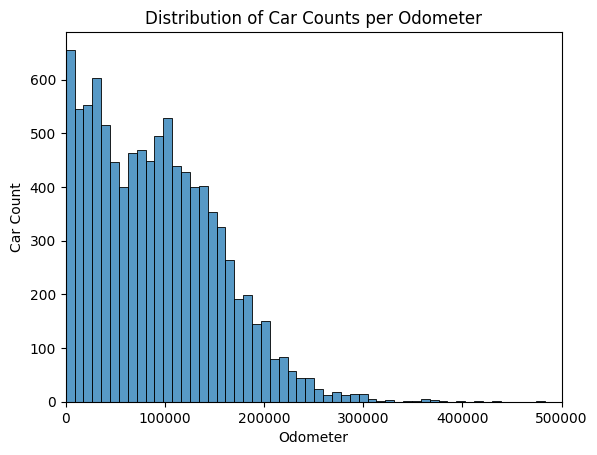

In [ ]:
#Odometer less than 500000 for meaningful visual.
ax = sns.histplot(data = car_df_sample[car_df_sample['odometer'] < 500000], x='odometer')
ax.set_xlim(left=0, right=500000)
ax.set_title('Distribution of Car Counts per Odometer')
ax.set_xlabel('Odometer')
ax.set_ylabel('Car Count')
plt.show()

,0
manufacturer,"manufacturer ford 0.166288 chevrolet 0.128992 toyota 0.080121 honda 0.049824 nissan 0.044666 jeep 0.044542 ram 0.042968 NaN 0.041337 gmc 0.039320 bmw 0.034434 dodge 0.032110 mercedes-benz 0.027682 hyundai 0.024218 subaru 0.022243 volkswagen 0.021891 kia 0.019811 lexus 0.019209 audi 0.017740 cadillac 0.016288 chrysler 0.014128 acura 0.014004 buick 0.012887 mazda 0.012713 infiniti 0.011249 lincoln 0.009886 volvo 0.007904 mitsubishi 0.007712 mini 0.005566 pontiac 0.005360 rover 0.004950 jaguar 0.004559 porsche 0.003242 mercury 0.002774 saturn 0.002553 alfa-romeo 0.002101 tesla 0.002033 fiat 0.001855 harley-davidson 0.000358 ferrari 0.000223 datsun 0.000148 aston-martin 0.000056 land rover 0.000049 morgan 0.000007 Name: proportion, dtype: float64"
model,"model f-150 0.018762 NaN 0.012362 silverado 1500 0.012041 1500 0.009865 camry 0.007344 ... Chev. Camaro Rs 0.000002 Dutchman Freedom Spirit 0.000002 5432a2 0.000002 traverse w/lt awd 0.000002 cobalt 2lt sport appea 0.000002 Name: proportion, Length: 29650, dtype: float64"
condition,"condition NaN 0.407852 good 0.284520 excellent 0.237694 like new 0.049611 fair 0.015857 new 0.003057 salvage 0.001408 Name: proportion, dtype: float64"
cylinders,"cylinders NaN 0.416225 6 cylinders 0.220598 4 cylinders 0.181882 8 cylinders 0.168811 5 cylinders 0.004010 10 cylinders 0.003408 other 0.003041 3 cylinders 0.001534 12 cylinders 0.000490 Name: proportion, dtype: float64"
fuel,"fuel gas 0.834448 other 0.071983 diesel 0.070423 hybrid 0.012111 NaN 0.007058 electric 0.003978 Name: proportion, dtype: float64"
title_status,"title_status clean 0.949018 NaN 0.019308 rebuilt 0.016911 salvage 0.009061 lien 0.003331 missing 0.001907 parts only 0.000464 Name: proportion, dtype: float64"
transmission,"transmission automatic 0.788334 other 0.146838 manual 0.058841 NaN 0.005988 Name: proportion, dtype: float64"
drive,"drive 4wd 0.308996 NaN 0.305863 fwd 0.247182 rwd 0.137959 Name: proportion, dtype: float64"
size,"size NaN 0.717675 full-size 0.148672 mid-size 0.080763 compact 0.045409 sub-compact 0.007482 Name: proportion, dtype: float64"
type,"type NaN 0.217527 sedan 0.203936 SUV 0.181044 pickup 0.101926 truck 0.082644 other 0.051794 coupe 0.044987 hatchback 0.038882 wagon 0.025185 van 0.020024 convertible 0.018110 mini-van 0.011303 offroad 0.001427 bus 0.001211 Name: proportion, dtype: float64"


,0
region,"(404,)"
manufacturer,"(43,)"
model,"(29650,)"
condition,"(7,)"
cylinders,"(9,)"
fuel,"(6,)"
title_status,"(7,)"
transmission,"(4,)"
drive,"(4,)"
size,"(5,)"


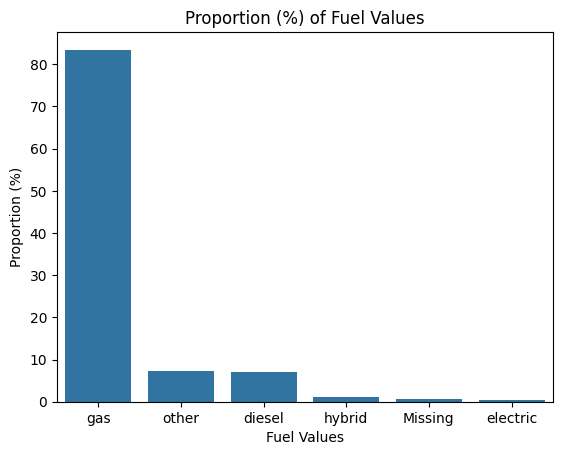

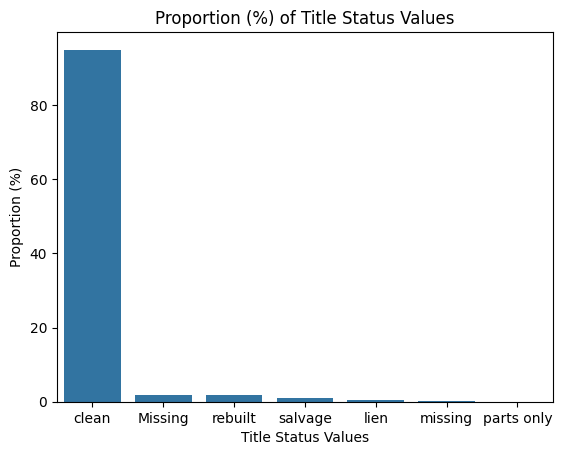

In [ ]:
#Checking unique values for each feature
pd.set_option('display.max_colwidth', None)

#checking all unique values & percentage for each feature except the ones with too many
#display(car_df.columns.unique())
display(pd.Series({col: car_df[col].value_counts(normalize=True, dropna=False) for col in car_df.columns if col not in ['VIN', 'region', 'id', 'price', 'odometer', 'year']}))
display(pd.Series({col: car_df[col].unique().shape for col in car_df.columns if col not in [ 'VIN', 'id', 'price', 'odometer', 'year']}))


vc = car_df['fuel'].value_counts(normalize=True, dropna=False).reset_index().fillna('Missing')
vc['proportion'] =  vc['proportion'] * 100
ax = sns.barplot(data=vc, x='fuel', y='proportion')
ax.set_title('Proportion (%) of Fuel Values')
ax.set_xlabel('Fuel Values')
ax.set_ylabel('Proportion (%)')
plt.show()


vc = car_df['title_status'].value_counts(normalize=True, dropna=False).reset_index().fillna('Missing')
vc['proportion'] =  vc['proportion'] * 100
ax = sns.barplot(data=vc, x='title_status', y='proportion',)
ax.set_title('Proportion (%) of Title Status Values')
ax.set_xlabel('Title Status Values')
ax.set_ylabel('Proportion (%)')
plt.show()

In [ ]:
#verify columns
car_df_sample.columns


Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

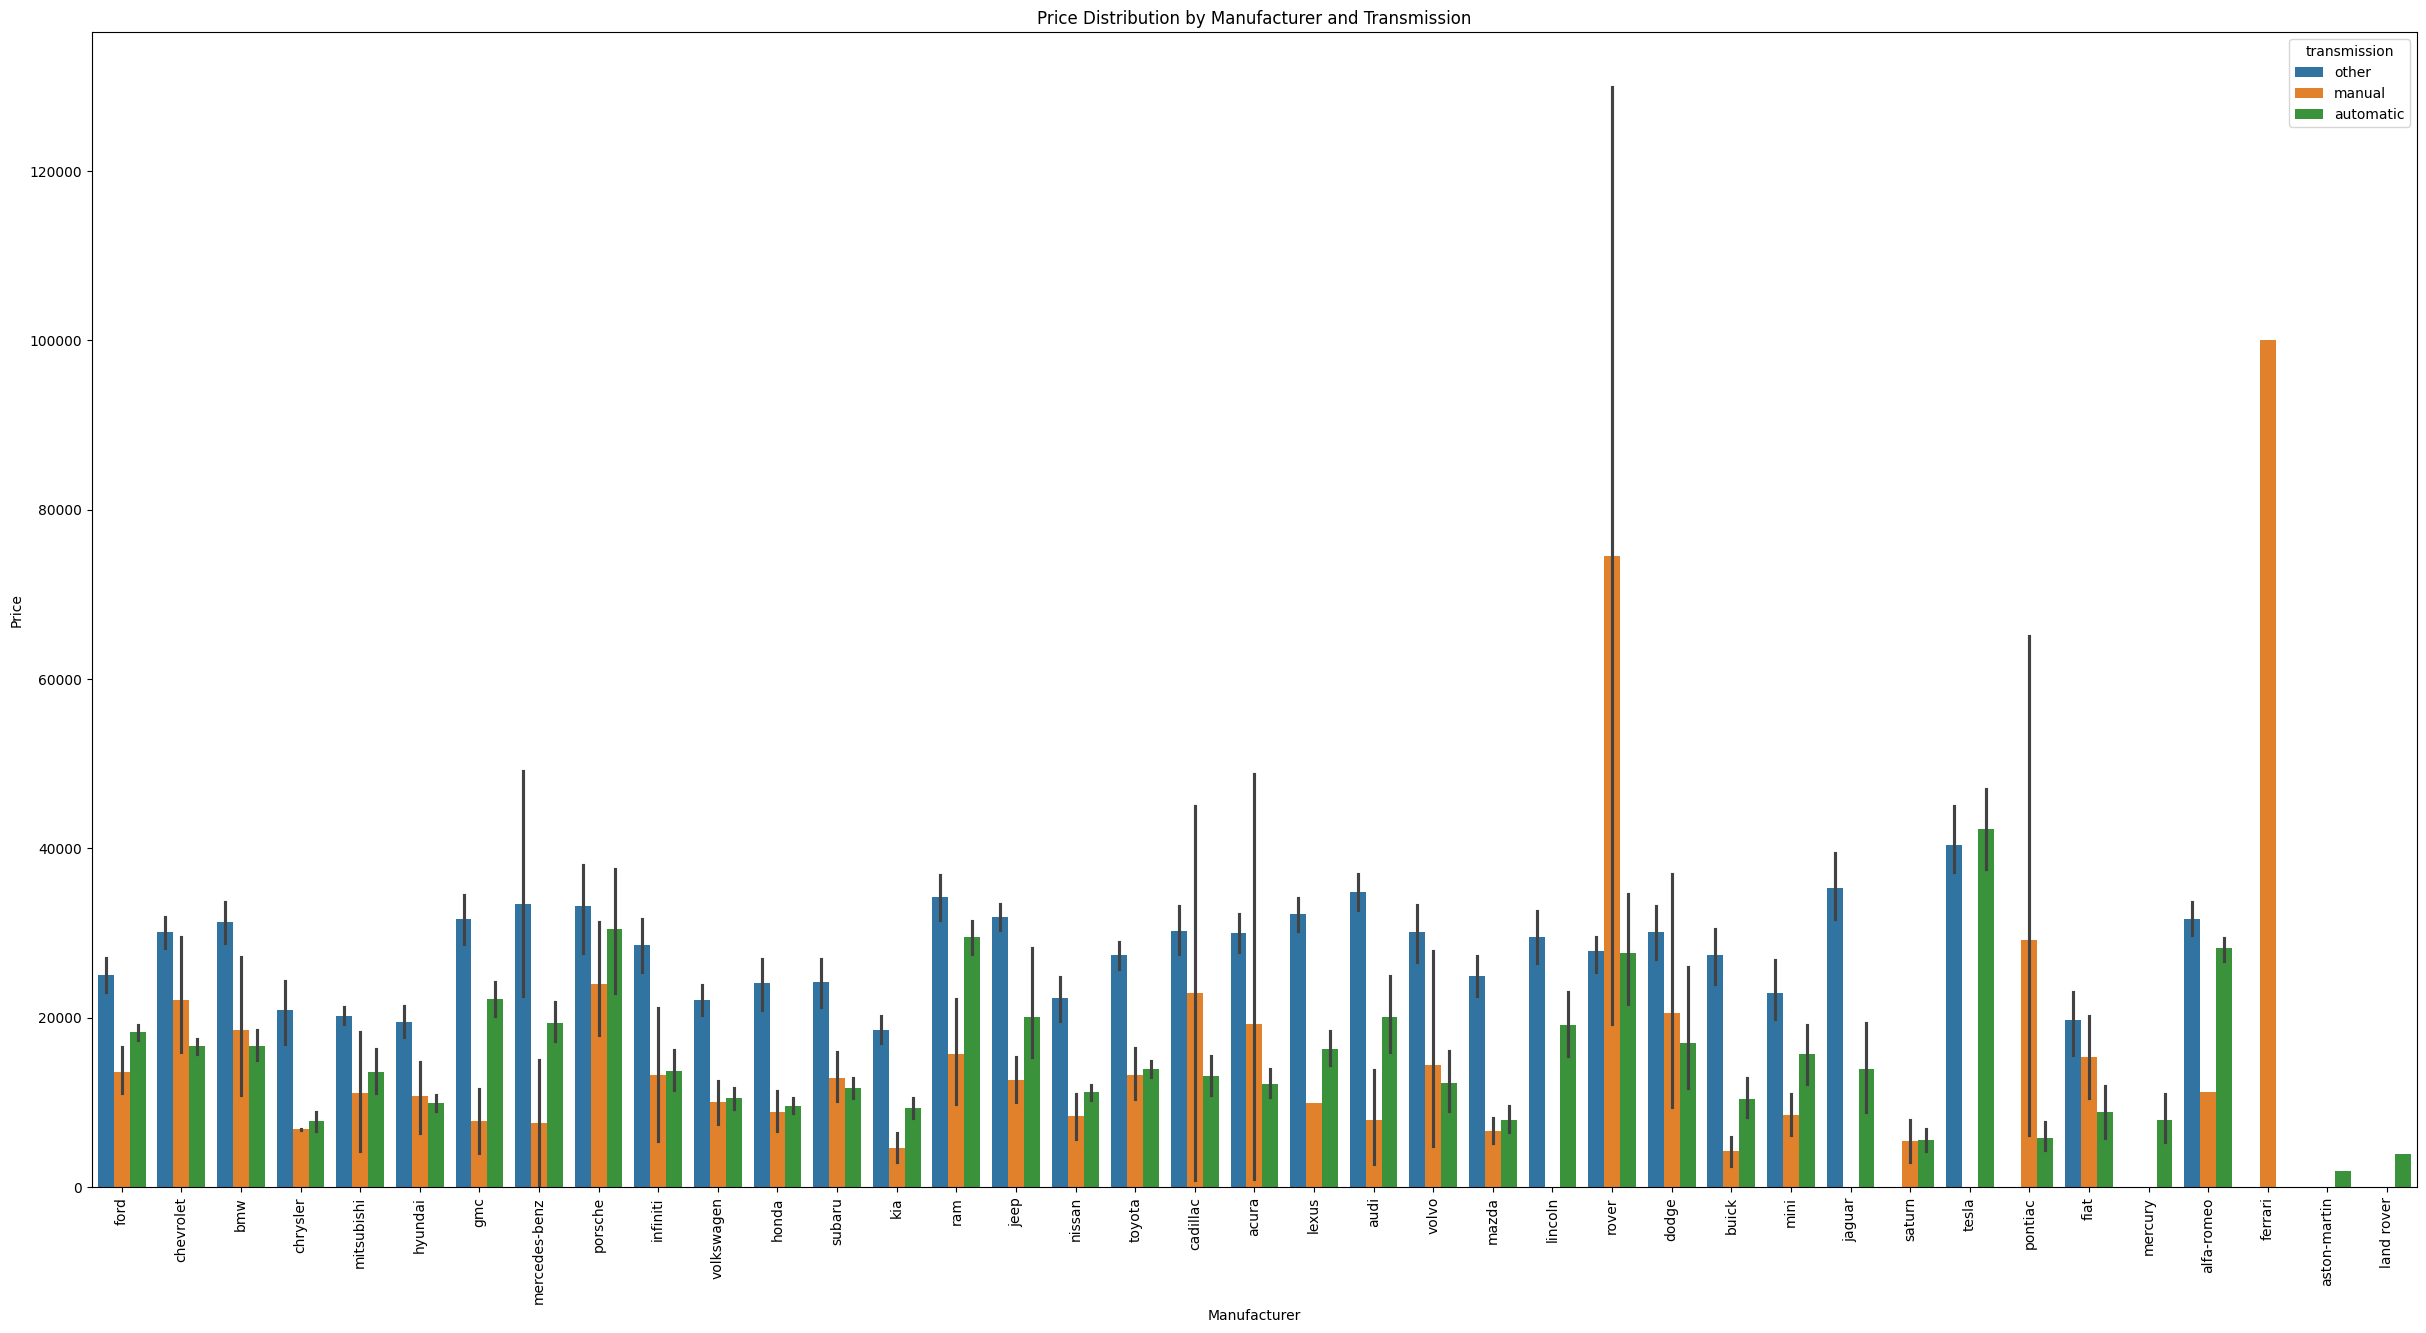

In [ ]:
plt.figure(figsize=(30, 15))
sns.barplot(x='manufacturer', y='price', hue='transmission', data=car_df_sample)

plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.title('Price Distribution by Manufacturer and Transmission')
plt.xticks(rotation=90)
plt.show()

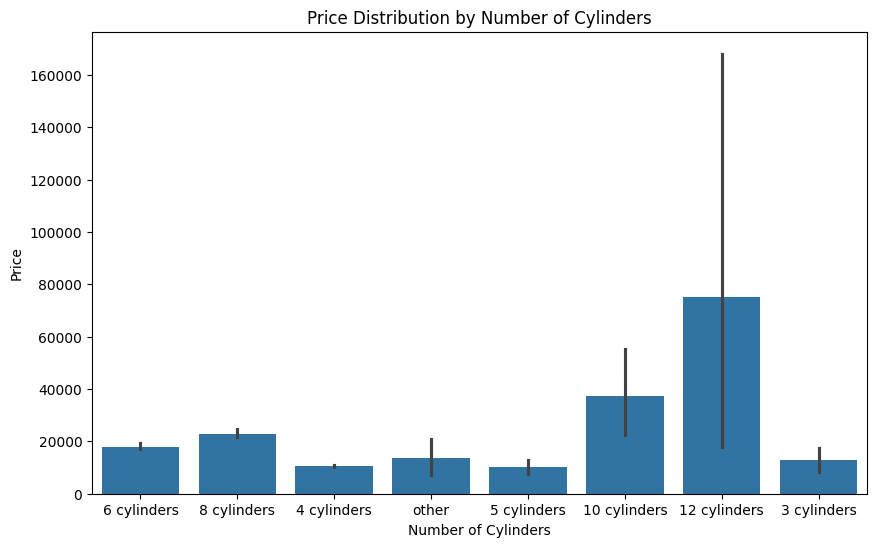

In [ ]:
#No. of cylinders vs price
plt.figure(figsize=(10, 6))
sns.barplot(x='cylinders', y='price', data=car_df_sample)
plt.xlabel('Number of Cylinders')
plt.ylabel('Price')
plt.title('Price Distribution by Number of Cylinders')
plt.show()

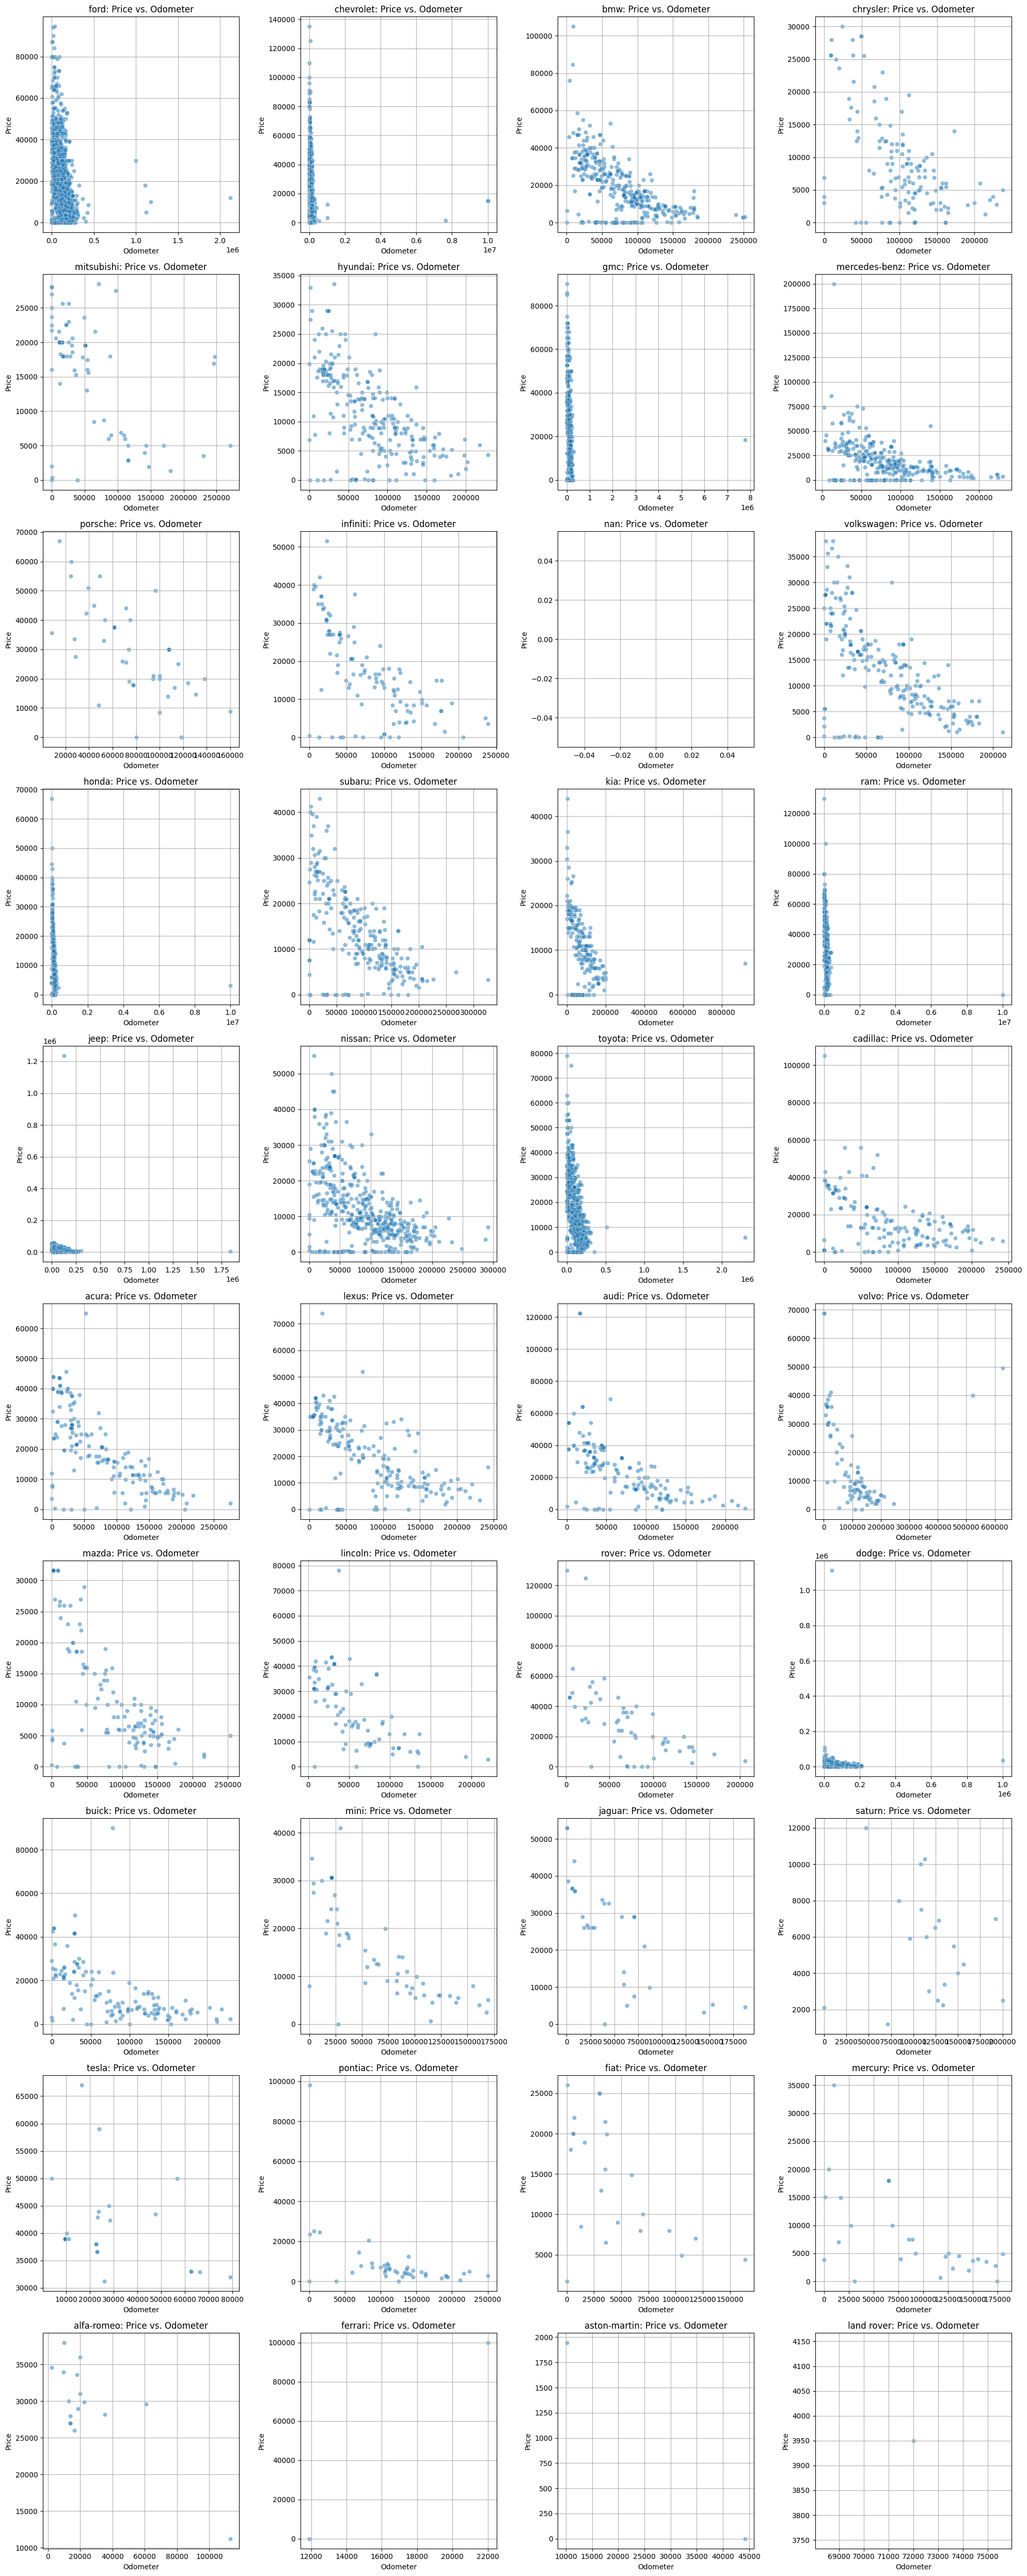

In [ ]:
# Get unique manufacturers from the sample data
manufacturers = car_df_sample['manufacturer'].unique()

# Determine the number of rows and columns for subplots
n_manufacturers = len(manufacturers)
n_cols = 4  # Number of plots per row
n_rows = (n_manufacturers + n_cols - 1) // n_cols  # Calculate number of rows

plt.figure(figsize=(n_cols * 5, n_rows * 5))  # Adjust overall figure size

for i, manufacturer in enumerate(manufacturers):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(data=car_df_sample[car_df_sample['manufacturer'] == manufacturer], x='odometer', y='price', alpha=0.5)
    plt.title(f'{manufacturer}: Price vs. Odometer')
    plt.xlabel('Odometer')
    plt.ylabel('Price')
    plt.grid(True)

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [ ]:
# Get total isna count per column

car_df.isna().sum()


,0
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


In [ ]:
#initial data removal - features based on domain knowlege
car_df_clean = car_df[['price', 'year', 'model', 'manufacturer', 'type', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'paint_color', 'state' ]].copy()

#2nd clean up for samples on condition and cylider as we know these affects the car prices.  cannot just remove this feature due to their importance
car_df_clean = car_df_clean.dropna(subset=['condition', 'cylinders'])

#3rd clean up for additional samples on other features
car_df_clean = car_df_clean.dropna(subset=['model', 'type', 'manufacturer', 'odometer', 'transmission'])

#after iterations of NaN removal reasoning, ending up keeping drive and paint_color, but also removing NaN sample.  Maybe I could have just removed the NaN from the beginning as data ended up into the state where I could've just do car_df.dropna() from the beginning.
car_df_clean = car_df_clean.dropna(subset=['drive', 'paint_color'])

#dropping duplicates at the end of data removal process to make sure all duplicates are removed with the final dataset.
car_df_clean = car_df_clean.drop_duplicates()

#Changing year and odometer to int
car_df_clean[['year', 'odometer']] = car_df_clean[['year', 'odometer']].astype(dtype=int)

#It probably make sense to use only recent year data like starting from 2000 instead of from 1900 or 1960.
car_df_clean = car_df_clean[car_df_clean['year'] > 2000]  #80k samples

#remove outliers using IQR
for col in car_df_clean.select_dtypes(include='number').columns:
    first_quartile = car_df_clean[col].quantile(.25)
    third_quartile = car_df_clean[col].quantile(.75)
    iqr = car_df_clean[col].quantile(.75) - car_df_clean[col].quantile(.25)
    lower = first_quartile - 1.5*iqr
    upper = third_quartile + 1.5*iqr
    car_df_clean = car_df_clean.loc[(car_df_clean[col]>lower) & (car_df_clean[col]<upper)]

display(f'final dups:  {car_df_clean.duplicated().sum()}')
display(car_df_clean.info())
car_df_clean.sample(100)

'final dups:  0'

<class 'pandas.core.frame.DataFrame'>
Index: 76252 entries, 31 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         76252 non-null  int64 
 1   year          76252 non-null  int64 
 2   model         76252 non-null  object
 3   manufacturer  76252 non-null  object
 4   type          76252 non-null  object
 5   condition     76252 non-null  object
 6   cylinders     76252 non-null  object
 7   fuel          76252 non-null  object
 8   odometer      76252 non-null  int64 
 9   transmission  76252 non-null  object
 10  drive         76252 non-null  object
 11  paint_color   76252 non-null  object
 12  state         76252 non-null  object
dtypes: int64(3), object(10)
memory usage: 8.1+ MB


None

,price,year,model,manufacturer,type,condition,cylinders,fuel,odometer,transmission,drive,paint_color,state
291227,8995,2012,acadia,gmc,SUV,good,6 cylinders,gas,159670,other,fwd,grey,oh
253787,2500,2006,escape,ford,SUV,good,4 cylinders,hybrid,123500,automatic,4wd,white,nj
169202,3995,2007,sonata,hyundai,sedan,good,4 cylinders,gas,164000,automatic,fwd,grey,ks
312701,18000,2011,f150 supercrew cab xlt,ford,truck,excellent,6 cylinders,gas,150200,automatic,4wd,silver,or
371326,10495,2012,murano sl,nissan,SUV,excellent,6 cylinders,gas,101624,automatic,fwd,white,tx
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215706,9950,2009,venza,toyota,wagon,excellent,6 cylinders,gas,181577,automatic,4wd,white,mn
21322,36885,2017,1500,ram,offroad,excellent,8 cylinders,gas,61400,automatic,rwd,grey,ca
28695,36300,2017,xts platinum,cadillac,hatchback,excellent,6 cylinders,gas,31200,automatic,4wd,red,ca
256465,5499,2008,grand caravan,dodge,mini-van,excellent,6 cylinders,gas,129779,automatic,fwd,blue,nj


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge


# Define features (X) and target (y)
X = car_df_clean.drop('price', axis=1)
y = car_df_clean['price']

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include='object').columns

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Linear Regression model
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])
lr_pipeline.fit(X_train, y_train)
lr_predictions = lr_pipeline.predict(X_test)

# Create and train Lasso Regression model
lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Lasso(alpha=0.1, random_state=42))]) # You can tune alpha
lasso_pipeline.fit(X_train, y_train)
lasso_predictions = lasso_pipeline.predict(X_test)

# Create and train Ridge Regression model
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Ridge(alpha=1.0, random_state=42))]) # You can tune alpha
ridge_pipeline.fit(X_train, y_train)
ridge_predictions = ridge_pipeline.predict(X_test)

display(lr_predictions)
display(lasso_predictions)
display(ridge_predictions)


array([ 4943.69542298,   991.67696377,   599.51285128, ...,
       15109.76239694, 24485.56272246, 29440.2859047 ])

array([ 4381.52952001,  1268.35227456,   150.34409114, ...,
       15314.87558739, 24861.87326789, 29609.01806076])

array([ 4575.9753784 ,  1149.45157709,   423.3060384 , ...,
       15292.39041755, 24644.48796223, 29630.21787466])

In [ ]:
# Sample results of each car price prediction vales per model and other detals as dataframe

# Create a DataFrame to hold the sample results
results_df = pd.DataFrame({
    'Actual Price': y_test,
    'Linear Regression Prediction': lr_predictions,
    'Lasso Regression Prediction': lasso_predictions,
    'Ridge Regression Prediction': ridge_predictions
})

# Add 'model' and 'manufacturer' from X_test to the results DataFrame
results_df['model'] = X_test['model']
results_df['manufacturer'] = X_test['manufacturer']


# Display a sample of the results
display(results_df.head())

,Actual Price,Linear Regression Prediction,Lasso Regression Prediction,Ridge Regression Prediction,model,manufacturer
121008,2500,4943.695423,4381.529520,4575.975378,sportage,kia
237477,4200,991.676964,1268.352275,1149.451577,fit sport,honda
340149,2800,599.512851,150.344091,423.306038,spectra,kia
361294,27999,26749.329530,26746.042056,26599.030509,3500,ram
186520,17997,19282.069822,20539.725150,19519.363801,1500 r/t sport 4wd,ram


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE for each model
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))

print(f'Linear Regression RMSE: {lr_rmse}')
print(f'Lasso Regression RMSE: {lasso_rmse}')
print(f'Ridge Regression RMSE: {ridge_rmse}')

print(f'Lowest RMSE: {min(lr_rmse, lasso_rmse, ridge_rmse)}')

Linear Regression RMSE: 5633.2119537952385
Lasso Regression RMSE: 5508.206037762836
Ridge Regression RMSE: 5483.224843957976
Lowest RMSE: 5483.224843957976


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.